train a model to predict if petra is crowded in a certain hour
either classification [crowding level] (high, moderate, low)
or regression [number of people] then a threshold 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

In [12]:
data = pd.read_csv("Petra_counts.csv")
data.head()

,Date,Hour,count
0,6/1/2025,0,0
1,6/1/2025,1,0
2,6/1/2025,2,0
3,6/1/2025,3,0
4,6/1/2025,4,0


In [13]:
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Hour'].astype(str) + ':00:00', dayfirst=False)
data.drop(['Date', 'Hour'], axis=1, inplace=True)

df = data.copy()

data['Count'] = data['count']
data.drop(['count'], axis=1, inplace=True)

df.set_index('datetime', inplace=True)
data.head()

,datetime,Count
0,2025-06-01 00:00:00,0
1,2025-06-01 01:00:00,0
2,2025-06-01 02:00:00,0
3,2025-06-01 03:00:00,0
4,2025-06-01 04:00:00,0


In [14]:
scaler = StandardScaler()

scaled_counts = df['count'].copy()

df['scaled_count'] = scaler.fit_transform(df[['count']]).flatten()

df.head(48)

,count,scaled_count
datetime,,
2025-06-01 00:00:00,0,-0.742552
2025-06-01 01:00:00,0,-0.742552
2025-06-01 02:00:00,0,-0.742552
2025-06-01 03:00:00,0,-0.742552
2025-06-01 04:00:00,0,-0.742552
2025-06-01 05:00:00,0,-0.742552
2025-06-01 06:00:00,5,-0.615816
2025-06-01 07:00:00,26,-0.083522
2025-06-01 08:00:00,10,-0.489079


In [15]:
n_hours = 24
X,y = [],[]
for i in range(len(df) - n_hours):
    X.append(df['scaled_count'].iloc[i:i+n_hours].values)
    y.append(df['scaled_count'].iloc[i+n_hours])

X = np.array(X)
y = np.array(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)

In [18]:
y_test_inverted = y_test.copy()
preds_inverted = preds.copy()

# Inverse-transform only the non-zero values
y_test_inverted = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
preds_inverted= scaler.inverse_transform(preds.reshape(-1, 1)).flatten()



In [19]:
r2 = r2_score(y_test_inverted, preds_inverted)
mae = mean_absolute_error(y_test_inverted, preds_inverted)
rmse = np.sqrt(mean_squared_error(y_test_inverted, preds_inverted))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9744
MAE: 3.4915
RMSE: 6.1776


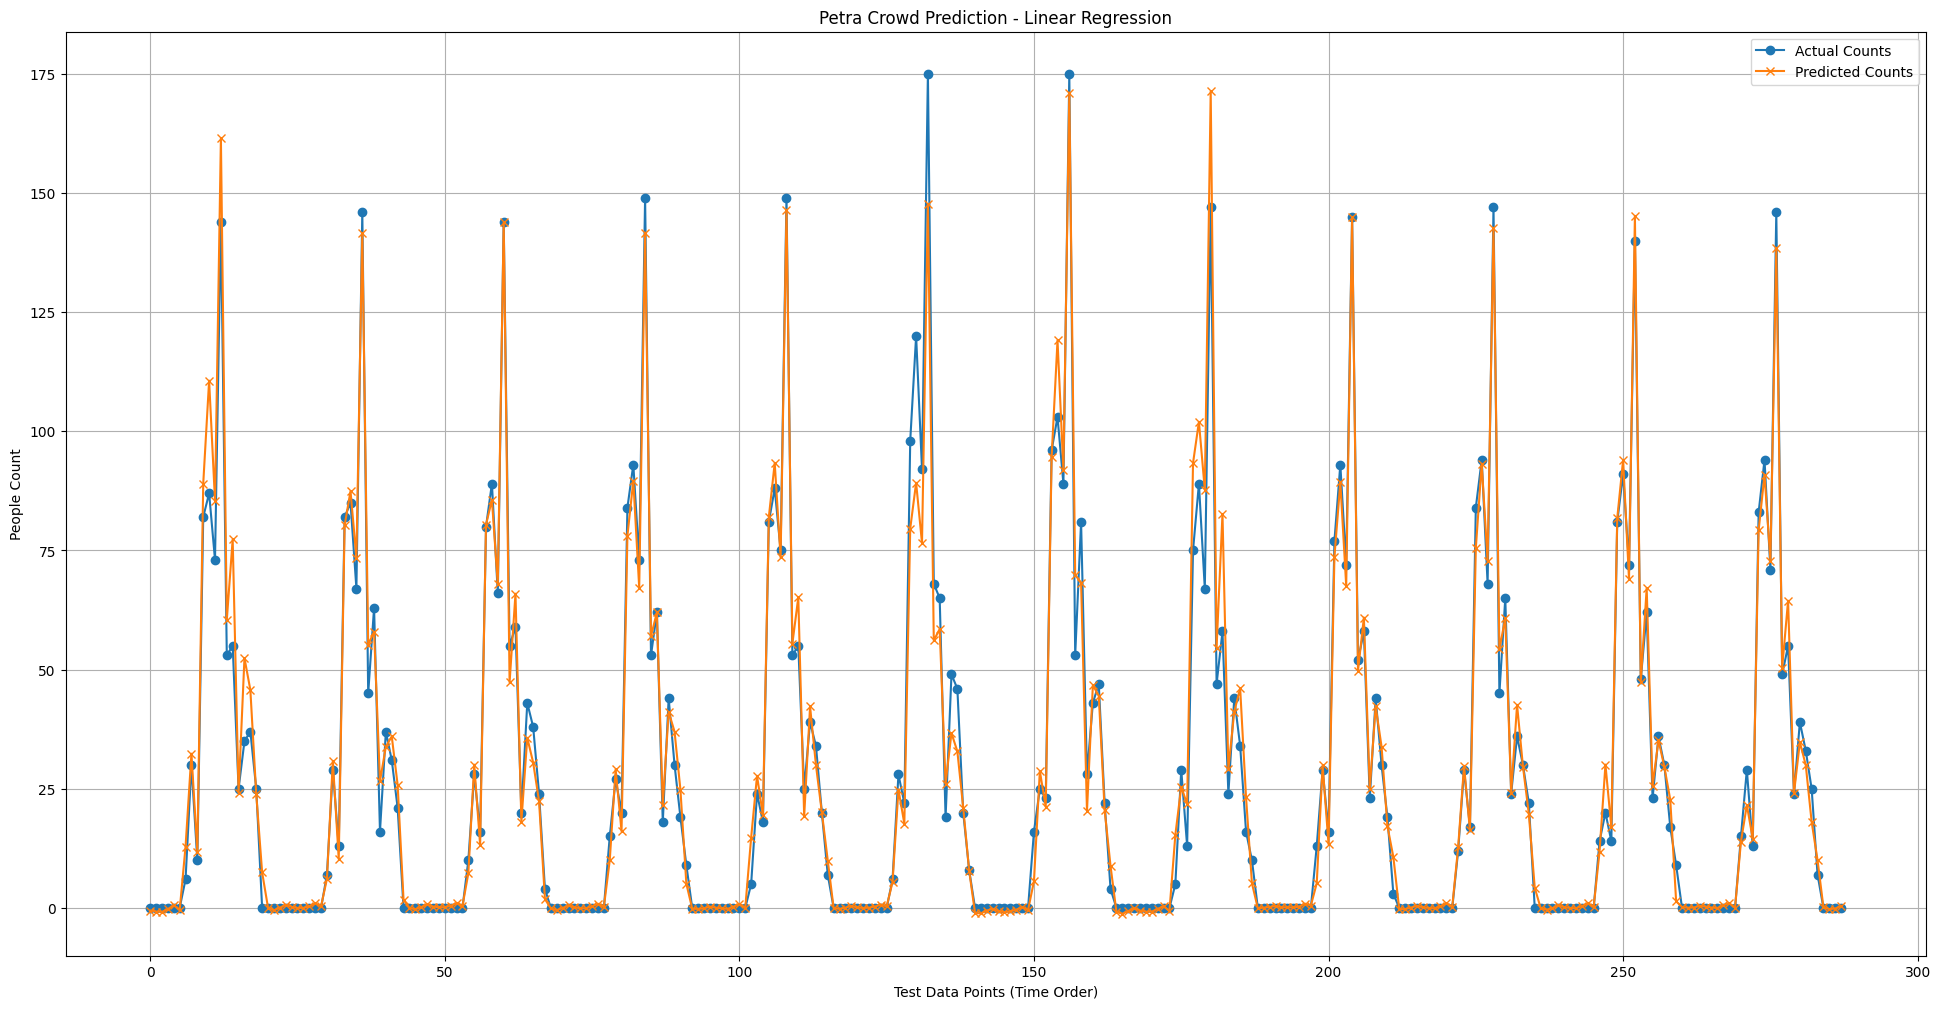

In [20]:
plt.figure(figsize=(24, 12))
plt.plot(y_test_inverted, label='Actual Counts', marker='o')
plt.plot(preds_inverted, label='Predicted Counts', marker='x')

plt.title("Petra Crowd Prediction - Linear Regression")
plt.xlabel("Test Data Points (Time Order)")
plt.ylabel("People Count")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
joblib.dump(model, 'linear_regression_petramodel.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [22]:
hours_to_predict = 31 * 24
last_known_index = df.index.get_loc(pd.Timestamp('2025-07-31 23:00:00'))
window = df['scaled_count'].iloc[last_known_index - n_hours + 1 : last_known_index + 1].values.tolist()
predictions_scaled = []
for _ in range(hours_to_predict):
    input_array = np.array(window[-n_hours:]).reshape(1, -1)
    pred = model.predict(input_array)[0]
    predictions_scaled.append(pred)
    window.append(pred)  # Append prediction to window for next step

In [23]:
predictions_unscaled = np.array(predictions_scaled).copy()
predictions_unscaled = scaler.inverse_transform(predictions_unscaled.reshape(-1, 1)).flatten()


start_date = pd.Timestamp('2025-08-01 00:00:00')
date_range = pd.date_range(start=start_date, periods=hours_to_predict, freq='h')
forecast_df = pd.DataFrame({
    'datetime': date_range,
    'Count': predictions_unscaled
})

print(forecast_df.head(24))

              datetime       Count
0  2025-08-01 00:00:00    0.179610
1  2025-08-01 01:00:00   -0.045554
2  2025-08-01 02:00:00   -0.199077
3  2025-08-01 03:00:00    0.312934
4  2025-08-01 04:00:00    1.063092
5  2025-08-01 05:00:00    0.125179
6  2025-08-01 06:00:00   14.600047
7  2025-08-01 07:00:00   30.056592
8  2025-08-01 08:00:00   13.374711
9  2025-08-01 09:00:00   81.008481
10 2025-08-01 10:00:00   93.877666
11 2025-08-01 11:00:00   71.577223
12 2025-08-01 12:00:00  143.937424
13 2025-08-01 13:00:00   51.484609
14 2025-08-01 14:00:00   57.745671
15 2025-08-01 15:00:00   25.241983
16 2025-08-01 16:00:00   37.790681
17 2025-08-01 17:00:00   32.487686
18 2025-08-01 18:00:00   25.514832
19 2025-08-01 19:00:00    8.141694
20 2025-08-01 20:00:00    0.217462
21 2025-08-01 21:00:00   -0.223698
22 2025-08-01 22:00:00   -0.173109
23 2025-08-01 23:00:00    0.324449


In [24]:
df_combined = pd.concat([data, forecast_df])
df_combined.to_csv('petra_counts_to_august.csv')